In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

In [3]:
# Load the dataset
df = pd.read_csv('../Chhesang/data/netflix_titles.csv')

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


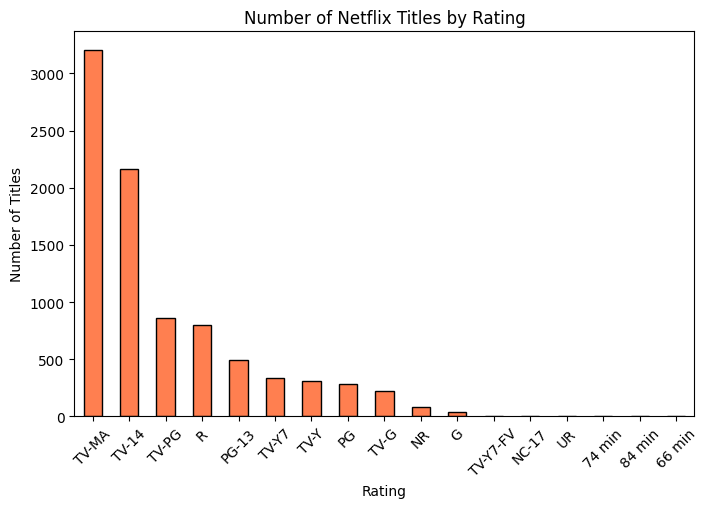

In [7]:


# Count the number of titles per rating
ratings_counts = df['rating'].value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
ratings_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Number of Netflix Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


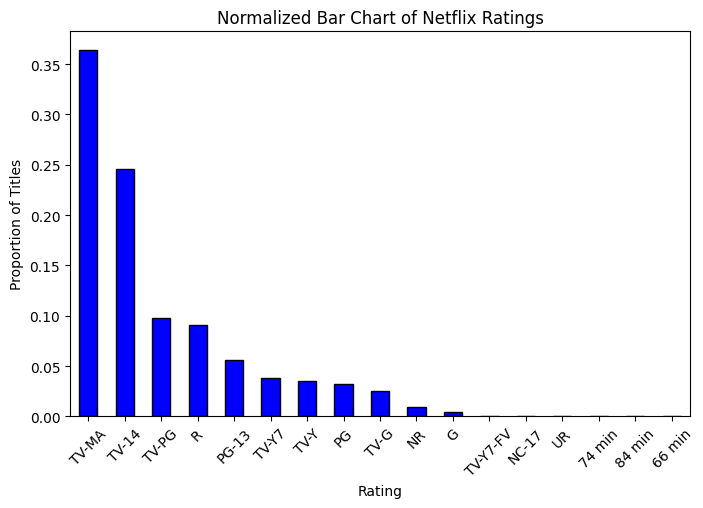

In [9]:


# Calculate the proportion of each rating
ratings_proportion = df['rating'].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
ratings_proportion.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Normalized Bar Chart of Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Proportion of Titles')
plt.xticks(rotation=45)
plt.show()


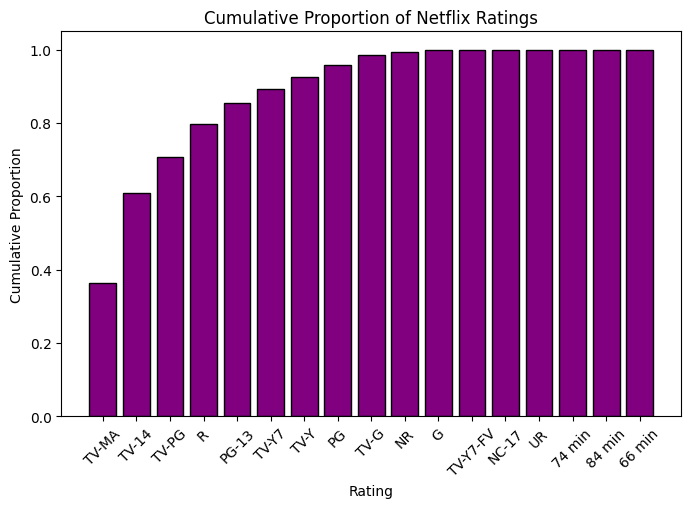

In [11]:
cum_props = (ratings_counts / ratings_counts.sum()).cumsum()

plt.figure(figsize=(8, 5))
plt.bar(ratings_counts.index, cum_props, color='purple', edgecolor='black')
plt.title('Cumulative Proportion of Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Cumulative Proportion')
plt.xticks(rotation=45)
plt.show()


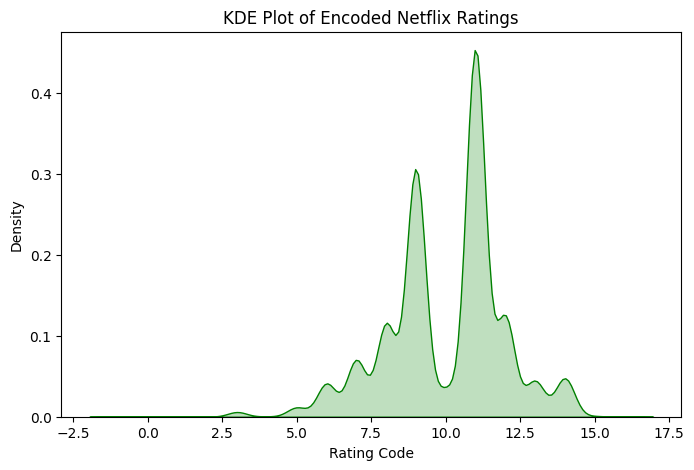

In [18]:
rating_codes = df['rating'].astype('category').cat.codes

plt.figure(figsize=(8, 5))
sns.kdeplot(rating_codes, fill=True, color='green')
plt.title('KDE Plot of Encoded Netflix Ratings')
plt.xlabel('Rating Code')
plt.ylabel('Density')

plt.show()

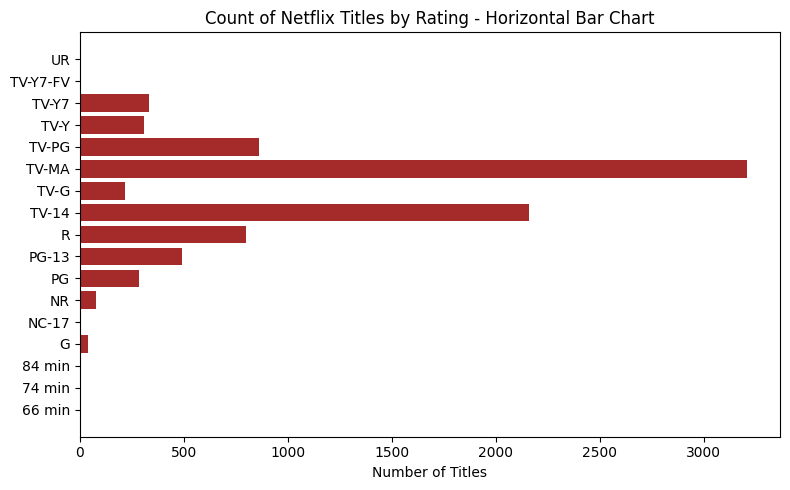

In [26]:


# Count the number of titles per rating
rating_counts = df['rating'].value_counts().sort_index()

categories = rating_counts.index.tolist()
counts = rating_counts.values.tolist()

plt.figure(figsize=(8, 5))
plt.barh(categories, counts, color='brown')
plt.xlabel('Number of Titles')
plt.title('Count of Netflix Titles by Rating - Horizontal Bar Chart')
plt.tight_layout()
plt.show()


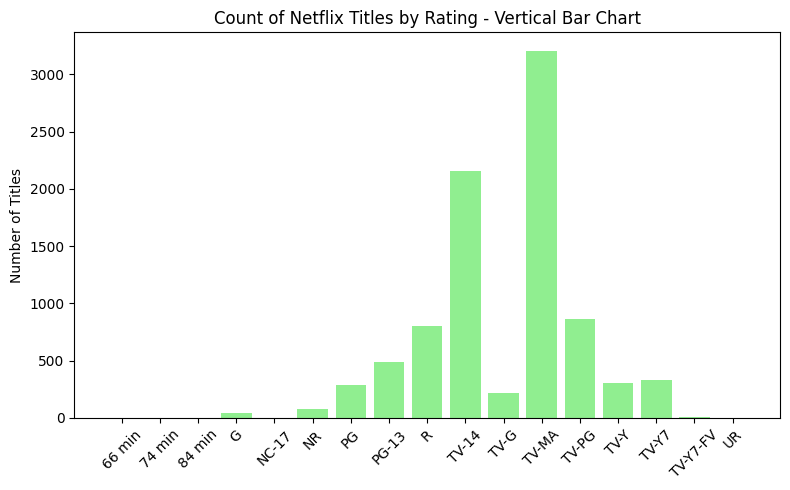

In [27]:


# Count titles per rating category
rating_counts = df['rating'].value_counts().sort_index()

categories = rating_counts.index.tolist()
counts = rating_counts.values.tolist()

plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='lightgreen')
plt.ylabel('Number of Titles')
plt.title('Count of Netflix Titles by Rating - Vertical Bar Chart')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


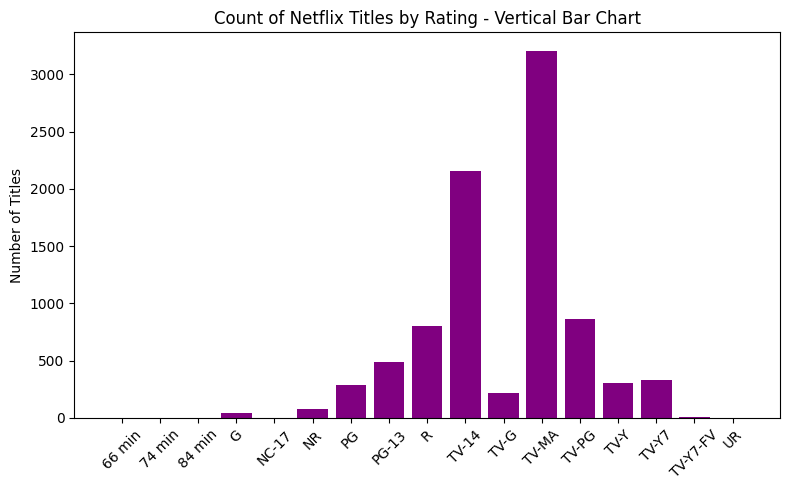

In [29]:


# Count titles per rating category
rating_counts = df['rating'].value_counts().sort_index()

categories = rating_counts.index.tolist()
counts = rating_counts.values.tolist()

plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color='purple')
plt.ylabel('Number of Titles')
plt.title('Count of Netflix Titles by Rating - Vertical Bar Chart')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


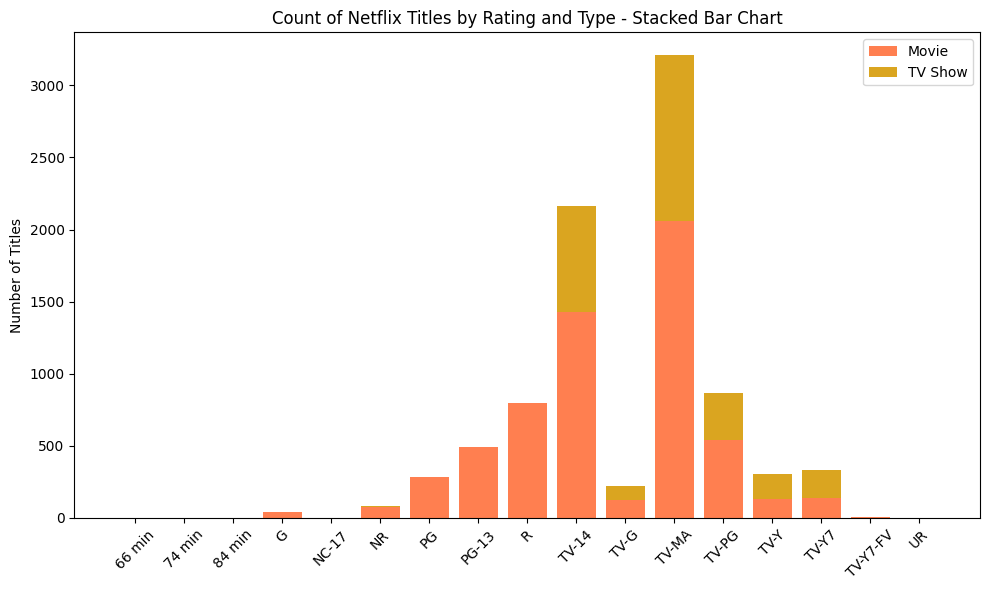

In [30]:


# Group and count number of titles by rating and type
counts_by_type = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

ratings = counts_by_type.index.tolist()
movies = counts_by_type['Movie']
tv_shows = counts_by_type['TV Show']

plt.figure(figsize=(10, 6))
plt.bar(ratings, movies, label='Movie', color='coral')
plt.bar(ratings, tv_shows, bottom=movies, label='TV Show', color='goldenrod')

plt.ylabel('Number of Titles')
plt.title('Count of Netflix Titles by Rating and Type - Stacked Bar Chart')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


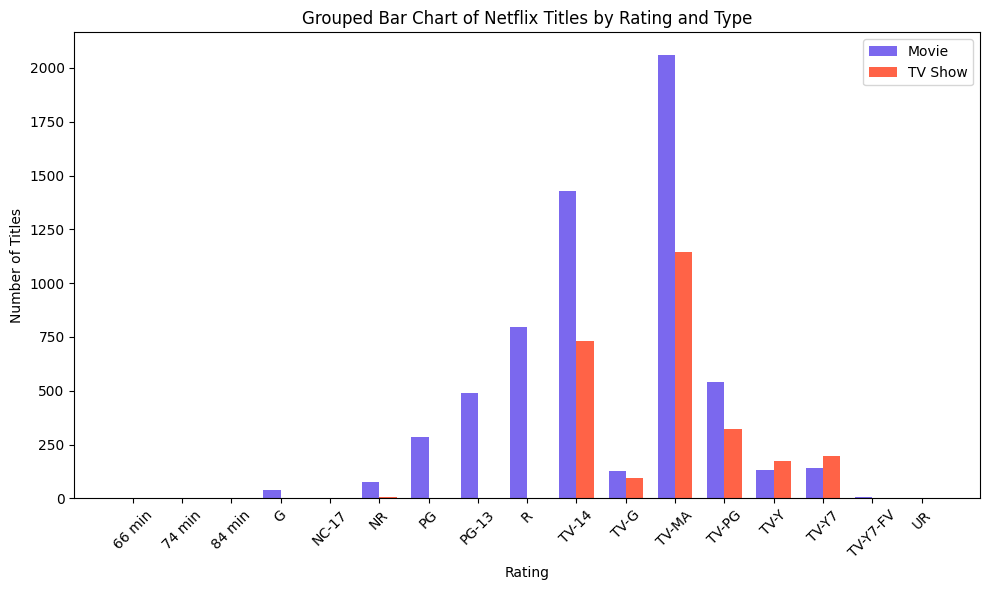

In [31]:


# Group and count number of titles by rating and type
counts_by_type = df.groupby(['rating', 'type']).size().unstack(fill_value=0)

ratings = counts_by_type.index.tolist()
movies = counts_by_type['Movie']
tv_shows = counts_by_type['TV Show']

x = np.arange(len(ratings))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, movies, width, label='Movie', color='mediumslateblue')
plt.bar(x + width/2, tv_shows, width, label='TV Show', color='tomato')

plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.title('Grouped Bar Chart of Netflix Titles by Rating and Type')
plt.xticks(x, ratings, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


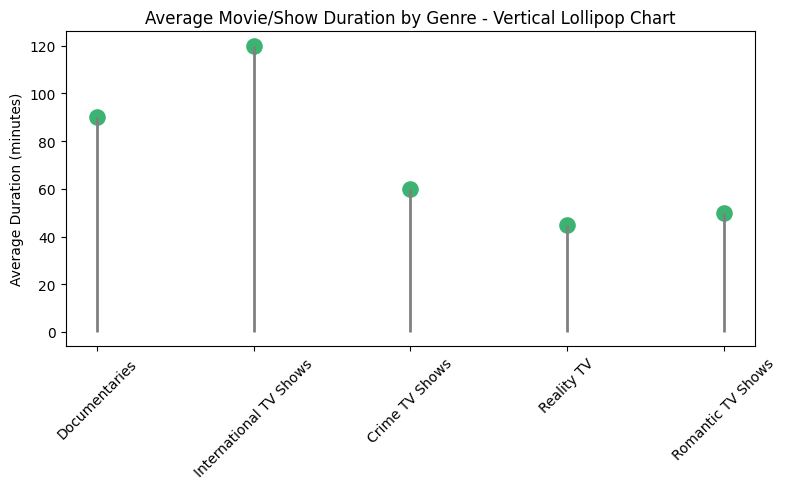

In [32]:

# Example categories (genres) and average durations (in minutes)
genres = ['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Reality TV', 'Romantic TV Shows']
avg_durations = [90, 120, 60, 45, 50]  # Replace with actual averages if you have them

plt.figure(figsize=(8, 5))
plt.vlines(x=genres, ymin=0, ymax=avg_durations, color='gray', linewidth=2)
plt.scatter(genres, avg_durations, color='mediumseagreen', s=120)
plt.ylabel('Average Duration (minutes)')
plt.title('Average Movie/Show Duration by Genre - Vertical Lollipop Chart')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

print(type_counts)



type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [34]:
type_counts = df['type'].value_counts()
labels = type_counts.index
sizes = type_counts.values

print(type_counts)



type
Movie      6131
TV Show    2676
Name: count, dtype: int64


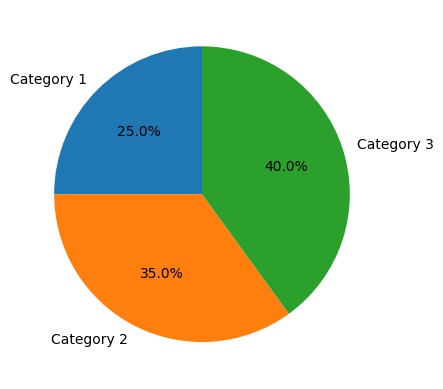

In [36]:

# New data example
values = [25, 35, 40]
labels = ['Category 1', 'Category 2', 'Category 3']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


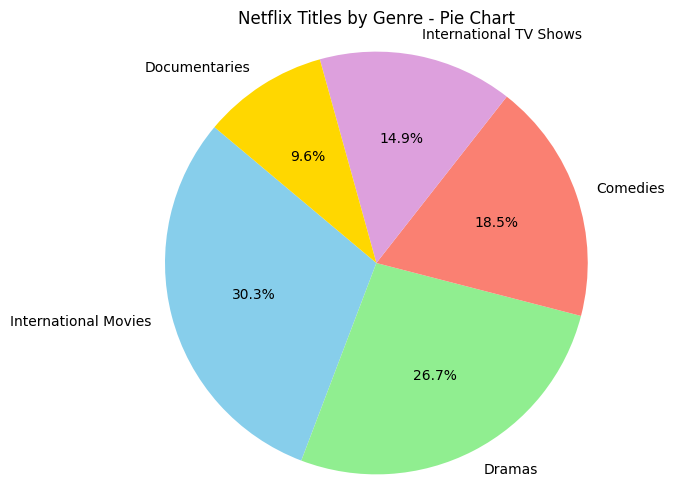

In [38]:
# Explode genres (if multiple genres per title)
genres_series = df['listed_in'].str.split(', ').explode()

# Get counts for top 5 genres
top_genres_counts = genres_series.value_counts().head(5)

labels = top_genres_counts.index.tolist()
sizes = top_genres_counts.values.tolist()

colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Netflix Titles by Genre - Pie Chart')
plt.axis('equal')
plt.show()


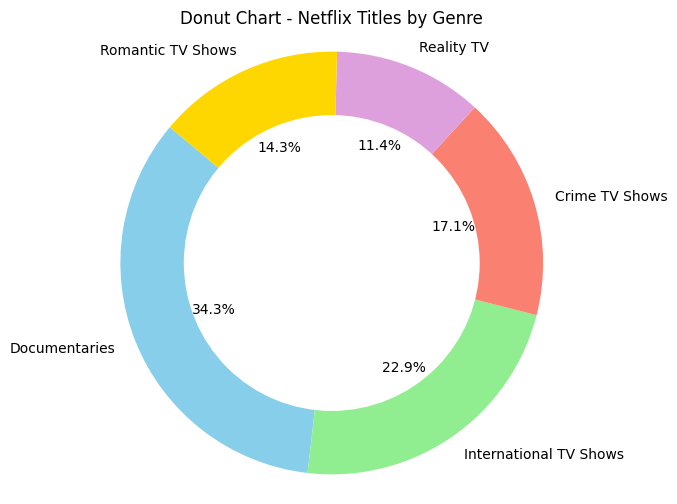

In [39]:


# Example Netflix genres and counts (replace with your data)
labels = ['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Reality TV', 'Romantic TV Shows']
sizes = [120, 80, 60, 40, 50]  # Replace with actual genre counts

colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Draw center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Donut Chart - Netflix Titles by Genre')
plt.axis('equal')  # Equal aspect ratio ensures donut is circular
plt.show()


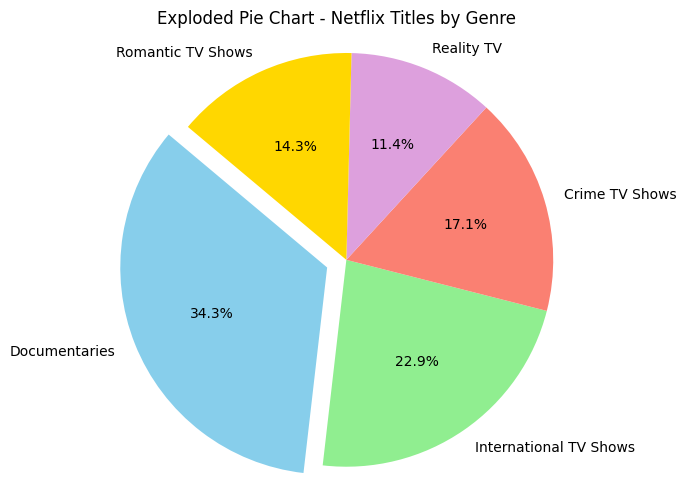

In [40]:


# Netflix genres and example counts (replace with your actual data)
labels = ['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Reality TV', 'Romantic TV Shows']
sizes = [120, 80, 60, 40, 50]

# Explode first slice (Documentaries) slightly
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, colors=colors)
plt.title('Exploded Pie Chart - Netflix Titles by Genre')
plt.axis('equal')  # Keep chart circular
plt.show()


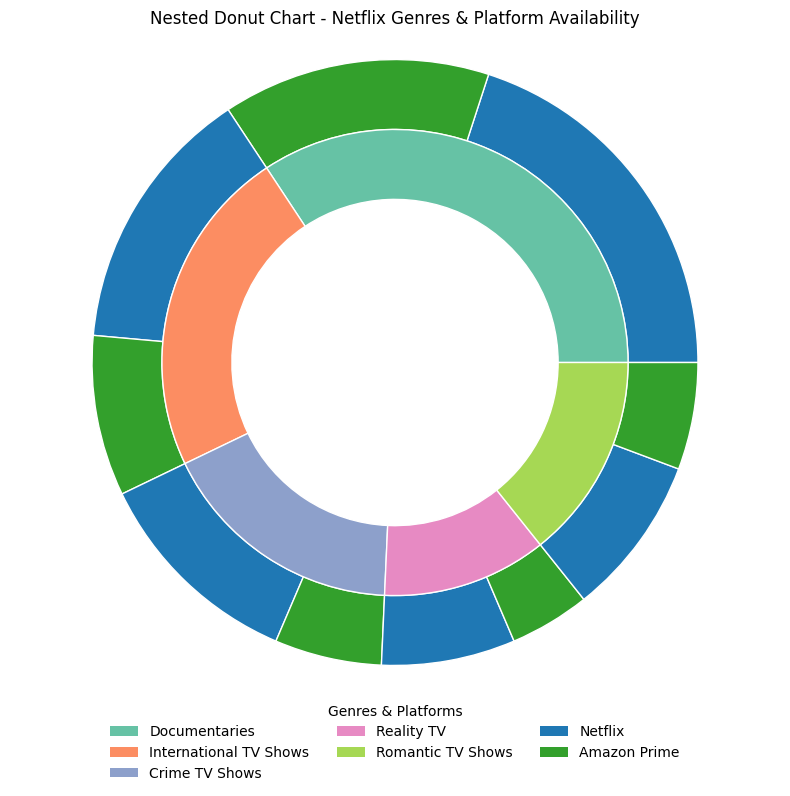

In [41]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Inner ring: Netflix genres counts (example data)
inner_labels = ['Documentaries', 'International TV Shows', 'Crime TV Shows', 'Reality TV', 'Romantic TV Shows']
inner_sizes = [120, 80, 60, 40, 50]
inner_colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']  # custom distinct colors

# Outer ring: availability on two platforms by genre (example data)
# For each genre, how many titles are on Netflix and on Amazon Prime
outer_labels = []
outer_sizes = []
outer_colors = []

platform_colors = {
    'Netflix': '#1f78b4',   # blue
    'Amazon Prime': '#33a02c'  # green
}

# Sample counts for each genre split by platform (fictional numbers)
availability = {
    'Documentaries': {'Netflix': 70, 'Amazon Prime': 50},
    'International TV Shows': {'Netflix': 50, 'Amazon Prime': 30},
    'Crime TV Shows': {'Netflix': 40, 'Amazon Prime': 20},
    'Reality TV': {'Netflix': 25, 'Amazon Prime': 15},
    'Romantic TV Shows': {'Netflix': 30, 'Amazon Prime': 20},
}

for genre in inner_labels:
    for platform in ['Netflix', 'Amazon Prime']:
        count = availability[genre].get(platform, 0)
        outer_labels.append(f'{genre} - {platform}')
        outer_sizes.append(count)
        outer_colors.append(platform_colors[platform])

# Plot the nested donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Outer ring
ax.pie(outer_sizes,
       radius=1.3,
       labels=None,
       colors=outer_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'))

# Inner ring
ax.pie(inner_sizes,
       radius=1,
       labels=None,
       colors=inner_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'),
       labeldistance=0.7)

# Legend
legend_elements = [
    Patch(facecolor='#66c2a5', label='Documentaries'),
    Patch(facecolor='#fc8d62', label='International TV Shows'),
    Patch(facecolor='#8da0cb', label='Crime TV Shows'),
    Patch(facecolor='#e78ac3', label='Reality TV'),
    Patch(facecolor='#a6d854', label='Romantic TV Shows'),
    Patch(facecolor='#1f78b4', label='Netflix'),
    Patch(facecolor='#33a02c', label='Amazon Prime'),
]

plt.legend(handles=legend_elements,
           title='Genres & Platforms',
           loc='lower center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)

plt.title('Nested Donut Chart - Netflix Genres & Platform Availability')
plt.axis('equal')
plt.tight_layout()
plt.show()


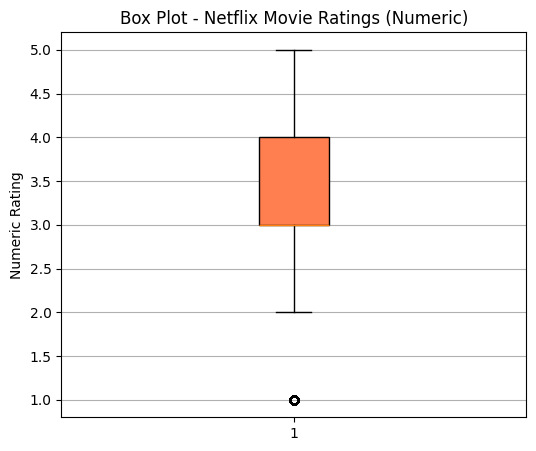

In [44]:
# Example mapping of common Netflix ratings to numeric scale
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4,
    # Add others if necessary, or assign NaN to unknowns
}

# Assuming your dataframe is named df
df['rating_num'] = df['rating'].map(rating_map)

# Drop rows with NaN ratings if needed
df_clean = df.dropna(subset=['rating_num'])

# Extract the numeric ratings column
movie_ratings = df_clean['rating_num']


plt.figure(figsize=(6, 5))
plt.boxplot(movie_ratings, vert=True, patch_artist=True, boxprops=dict(facecolor='coral'))
plt.title('Box Plot - Netflix Movie Ratings (Numeric)')
plt.ylabel('Numeric Rating')
plt.grid(axis='y')
plt.show()


C:\Users\lamac\AppData\Local\Temp\ipykernel_12880\407522592.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


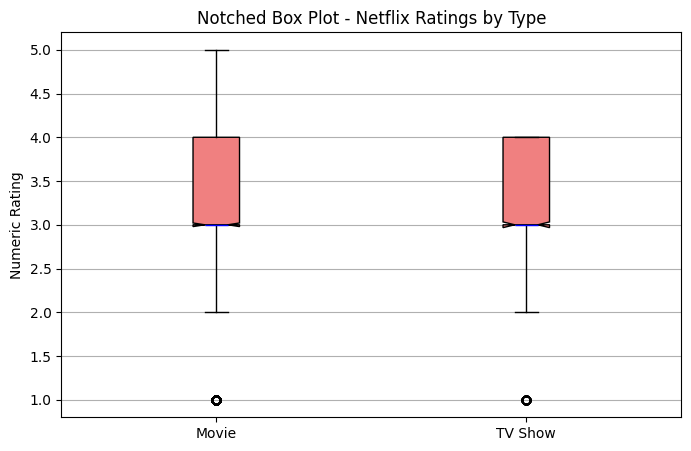

In [45]:
import matplotlib.pyplot as plt

# Prepare data
movie_ratings = df[df['type'] == 'Movie']['rating_num'].dropna()
tvshow_ratings = df[df['type'] == 'TV Show']['rating_num'].dropna()

# Create notched box plot
plt.figure(figsize=(8, 5))
plt.boxplot(
    [movie_ratings, tvshow_ratings],
    labels=['Movie', 'TV Show'],
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='blue'),
)

plt.title('Notched Box Plot - Netflix Ratings by Type')
plt.ylabel('Numeric Rating')
plt.grid(axis='y')
plt.show()


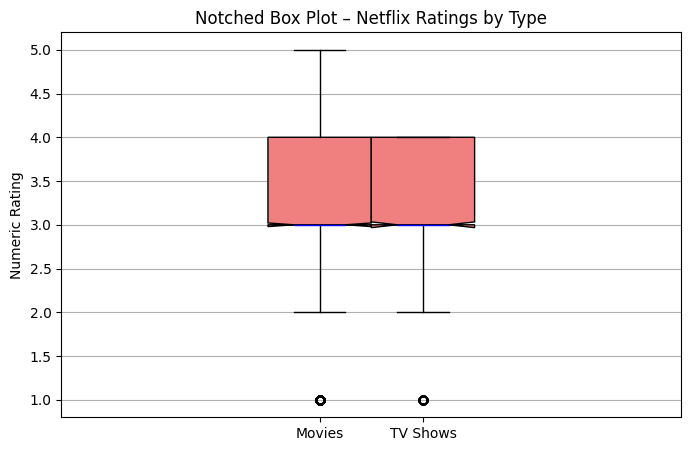

Movies Five Number Summary: {'Min': np.float64(1.0), 'Q1': np.float64(3.0), 'Median (Q2)': np.float64(3.0), 'Q3': np.float64(4.0), 'Max': np.float64(5.0)}
TV Shows Five Number Summary: {'Min': np.float64(1.0), 'Q1': np.float64(3.0), 'Median (Q2)': np.float64(3.0), 'Q3': np.float64(4.0), 'Max': np.float64(4.0)}


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def five_number_summary(data, label="Group"):
    return {
        "Min": np.min(data),
        "Q1": np.percentile(data, 25),
        "Median (Q2)": np.median(data),
        "Q3": np.percentile(data, 75),
        "Max": np.max(data)
    }

# Assuming you have a numeric rating column 'rating_num' in your dataframe df
movie_ratings = df[df['type'] == 'Movie']['rating_num'].dropna()
tvshow_ratings = df[df['type'] == 'TV Show']['rating_num'].dropna()

# Plot: boxes at custom positions closer together
plt.figure(figsize=(8, 5))
plt.boxplot(
    [movie_ratings, tvshow_ratings],
    positions=[1.0, 1.2],  # Closer positions
    widths=0.2,
    notch=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='blue')
)

# Set x-axis labels at positions matching boxes
plt.xticks([1.0, 1.2], ['Movies', 'TV Shows'])
plt.title('Notched Box Plot – Netflix Ratings by Type')
plt.ylabel('Numeric Rating')
plt.grid(axis='y')
plt.show()

# Get summaries
summary_movies = five_number_summary(movie_ratings, label="Movies")
summary_tvshows = five_number_summary(tvshow_ratings, label="TV Shows")

print("Movies Five Number Summary:", summary_movies)
print("TV Shows Five Number Summary:", summary_tvshows)


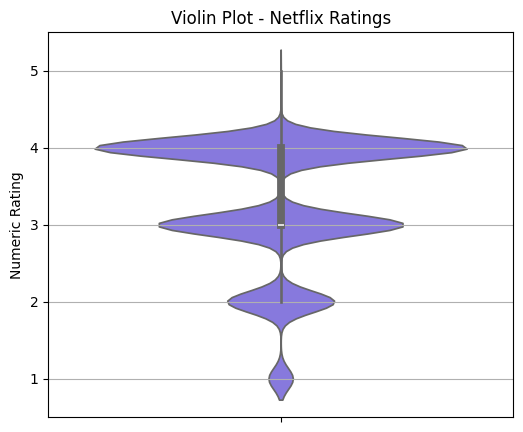

In [47]:


plt.figure(figsize=(6, 5))
sns.violinplot(y=df['rating_num'], inner='box', color='mediumslateblue')
plt.title('Violin Plot - Netflix Ratings')
plt.ylabel('Numeric Rating')
plt.grid(axis='y')
plt.show()


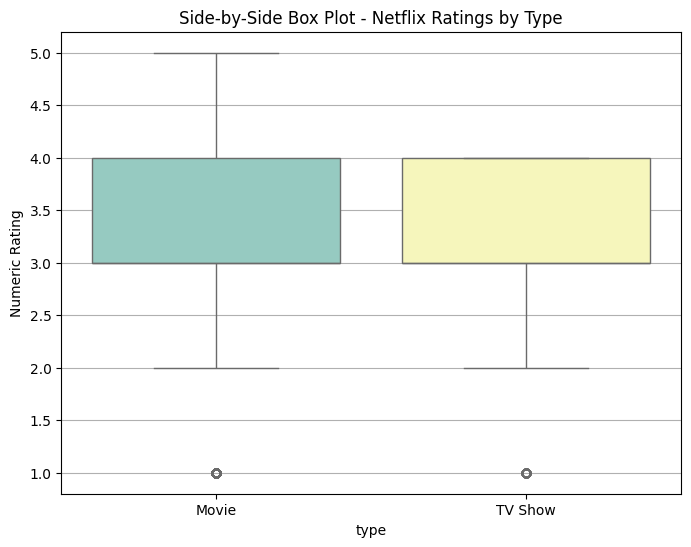

Median Rating - Movie: 3.0
Median Rating - TV Show: 3.0


In [48]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='type', hue='type', y='rating_num', data=df, palette='Set3')
plt.title('Side-by-Side Box Plot - Netflix Ratings by Type')
plt.ylabel('Numeric Rating')
plt.grid(axis='y')
plt.show()

medians = df.groupby('type')['rating_num'].median()

# Print the results
for t, med in medians.items():
    print(f"Median Rating - {t}: {med}")
